In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. 데이터 확인

In [132]:
delivery_df = pd.read_csv('/jupyter/Data/Delivery/delivery_raw.csv', sep='\t')
delivery_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [133]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [134]:
delivery_df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift                                   16262
total_busy                                      16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [135]:
delivery_df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


## 2. EDA & FE

### actual_delivery_time

In [136]:
time_nan = delivery_df[delivery_df['actual_delivery_time'].isnull()].index
delivery_df.drop(time_nan, axis=0, inplace=True)
delivery_df['actual_delivery_time'].isnull().sum()

0

actual_delivery_time이 NULL값을 가지게 되면 target label이 없는것이나 다름이 없으므로 해당 데이터를 drop

In [137]:
# datetime 형식으로 변경
delivery_df['actual_delivery_time'] = pd.to_datetime(delivery_df['actual_delivery_time'])

### created_at

In [138]:
# datetime 형식으로 변경
delivery_df['created_at'] = pd.to_datetime(delivery_df['created_at'])

### delivery_time(target label)

In [139]:
delivery_df['delivery_time'] = delivery_df['actual_delivery_time'] - delivery_df['created_at']
delivery_df['delivery_time']

0        0 days 01:02:59
1        0 days 01:07:04
2        0 days 00:29:41
3        0 days 00:51:15
4        0 days 00:39:50
               ...      
197423   0 days 01:05:07
197424   0 days 00:56:23
197425   0 days 00:50:08
197426   0 days 01:05:07
197427   0 days 00:37:08
Name: delivery_time, Length: 197421, dtype: timedelta64[ns]

In [140]:
delivery_df['delivery_time'].dt.days.value_counts()

0     197418
98         1
3          1
4          1
Name: delivery_time, dtype: int64

In [141]:
# 이상치라고 판단되는 데이터를 제거

outlier_idx = delivery_df[
    (delivery_df['delivery_time'].dt.days==98) | 
    (delivery_df['delivery_time'].dt.days==3)  |
    (delivery_df['delivery_time'].dt.days==4)
].index
outlier_idx

Int64Index([2690, 27189, 185550], dtype='int64')

In [142]:
delivery_df.drop(outlier_idx, axis=0, inplace=True)
delivery_df['delivery_time'].dt.days.value_counts()

0    197418
Name: delivery_time, dtype: int64

In [143]:
# target label을 초단위로 변경
def time_to_second(delivery_time):
    delivery_time = str(delivery_time)
    time = delivery_time.split(':')
    time[0] = time[0].split()[-1]
    result = int(time[0])*3600 + int(time[1])*60 + int(time[2])
    return result

delivery_df['delivery_time'] = delivery_df['delivery_time'].apply(time_to_second)
delivery_df['delivery_time']

0         3779
1         4024
2         1781
3         3075
4         2390
          ... 
197423    3907
197424    3383
197425    3008
197426    3907
197427    2228
Name: delivery_time, Length: 197418, dtype: int64

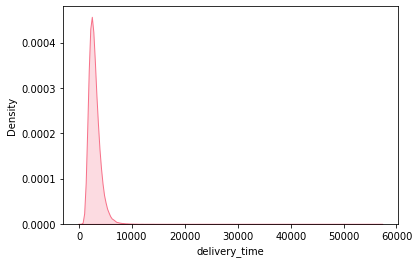

In [144]:
# target label 값 분포 확인
sns.set_palette("husl", 6)
sns.kdeplot(x='delivery_time', data=delivery_df, fill=True)
plt.show()

그래프가 왼쪽으로 조금 치우쳐 있으므로 로그 변환을 수행

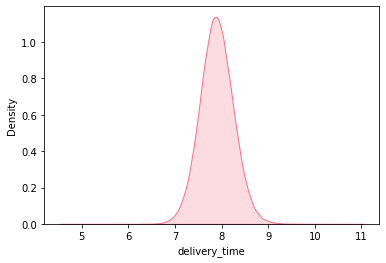

In [145]:
a = np.log(delivery_df['delivery_time'])
sns.kdeplot(a, fill=True)
plt.show()

### market_id

In [146]:
delivery_df['market_id'].isnull().sum()

987

987개의 NaN값을 확인할 수 있다.

**`store_id`로 `market_id`를 유추하는것이 가능하다.**

In [147]:
from collections import defaultdict
store_dic = defaultdict(set)

# store_id를 market_id 별로 딕셔너리에 분류
def cat_store_id(market, store):
    if np.isnan(market):
         return market
    store_dic[market].add(store)
    return market

In [148]:
delivery_df['market_id'] =  delivery_df.apply(lambda x: cat_store_id(x['market_id'], x['store_id']), axis=1)

In [149]:
market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for market in market_col:
    print(len(store_dic[market]))

2925
1939
2564
1818
1408
1310


In [150]:
delivery_df['store_id'].value_counts()

6865    937
1311    863
314     814
1686    765
3937    721
       ... 
1258      1
974       1
4260      1
6426      1
1845      1
Name: store_id, Length: 6743, dtype: int64

In [151]:
store_dic[1.0] -= (store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[2.0] -= (store_dic[1.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[3.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[4.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[5.0] | store_dic[6.0])
store_dic[5.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[6.0])
store_dic[6.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0])

In [152]:
market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for market in market_col:
    print(len(store_dic[market]))

1243
415
1644
1003
1125
1310


In [153]:
def fillna(market, store):
    if np.isnan(market):
        market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
        for i in market_col:
            if store in store_dic[i]:
                return i
        return market
    return market

In [154]:
delivery_df['market_id'] = delivery_df.apply(lambda x: fillna(x['market_id'], x['store_id']), axis=1)

In [155]:
delivery_df['market_id'].isnull().sum()

3

987개의 NaN값을 3개를 제외하고 전부 채워주었다.

In [156]:
delivery_df[delivery_df['market_id'].isnull()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
120923,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,2745
152850,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,3001
186154,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,1917


In [157]:
delivery_df[(delivery_df['store_id']==3258) | (delivery_df['store_id']==4122) | (delivery_df['store_id']==5774)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
120923,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,2745
152850,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,3001
186154,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,1917


In [158]:
market_id_nan = delivery_df[delivery_df['market_id'].isnull()].index
delivery_df.drop(market_id_nan, axis=0, inplace=True)

In [159]:
delivery_df['market_id'].isnull().sum()

0

### store_primary_category

In [160]:
delivery_df['store_primary_category'].isnull().sum()

4759

In [161]:
store_category_dic = defaultdict(list)

def cat_store(store_id, store_primary_category):
    if type(store_primary_category) == float:
        return store_primary_category
    else:
        store_category_dic[store_id].append(store_primary_category)
        return store_primary_category

In [162]:
delivery_df['store_primary_category'] = delivery_df.apply(lambda x: cat_store(x['store_id'], x['store_primary_category']), axis=1)

In [163]:
for store_id in store_category_dic:
    temp = defaultdict(int)
    maximum = ['default',0]
    for category in store_category_dic[store_id]:
        temp[category]+=1
        if temp[category] > maximum[1]:
            maximum = [category, temp[category]]
    store_category_dic[store_id] = maximum[0]

In [164]:
def fillna_store_primary_category(store_id, store_primary_category):
    if type(store_primary_category) == float:
        return store_category_dic[store_id]
    return store_primary_category

In [165]:
delivery_df['store_primary_category'] = delivery_df.apply(lambda x: fillna_store_primary_category(x['store_id'], x['store_primary_category']), axis=1)

In [166]:
delivery_df['store_primary_category'].isnull().sum()

0

### order protocol

In [167]:
delivery_df['order_protocol'].isnull().sum()

992

In [168]:
delivery_df['order_protocol'].value_counts()

1.0    54722
3.0    53196
5.0    44288
2.0    24051
4.0    19353
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [169]:
def fillna_order_protocol(store_id, order_protocol):
    if np.isnan(order_protocol):
        return delivery_df[delivery_df['store_id'] == store_id]['order_protocol'].value_counts().sort_values(ascending=False).index[0]
    else:
        return order_protocol

In [170]:
delivery_df['order_protocol'] = delivery_df.apply(lambda x: fillna_order_protocol(x['store_id'], x['order_protocol']), axis=1)

In [171]:
delivery_df['order_protocol'].isnull().sum()

0

### total_items

<AxesSubplot:xlabel='total_items', ylabel='Density'>

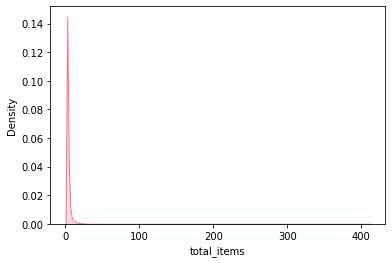

In [176]:
sns.kdeplot(x='total_items', data=delivery_df, fill=True)

In [177]:
delivery_df['total_items'].describe()

count    197415.000000
mean          3.196383
std           2.666585
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64

<AxesSubplot:xlabel='total_items', ylabel='subtotal'>

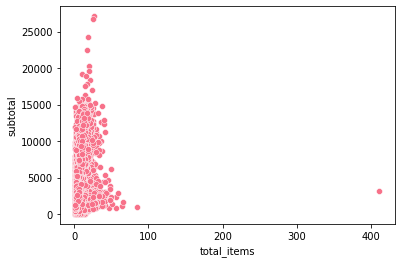

In [178]:
sns.scatterplot(x='total_items',y='subtotal',data=delivery_df)

이상치라고 판단되는 값을 제거한다.

In [179]:
outlier_idx = delivery_df[delivery_df['total_items'] == 411].index

In [180]:
delivery_df.drop(outlier_idx, axis=0, inplace=True)

<AxesSubplot:xlabel='total_items', ylabel='Density'>

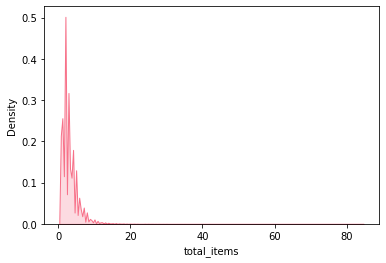

In [181]:
sns.kdeplot(x='total_items', data=delivery_df, fill=True)

### subtotal

<AxesSubplot:xlabel='subtotal', ylabel='Density'>

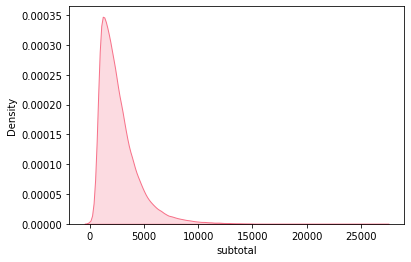

In [185]:
sns.kdeplot(x='subtotal', data=delivery_df, fill=True)

### num_distinct_items

<AxesSubplot:>

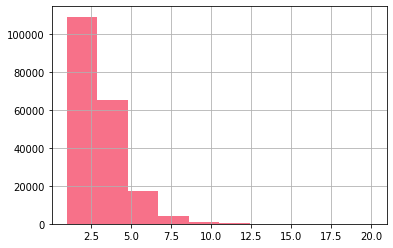

In [189]:
delivery_df['num_distinct_items'].hist()

### item_price

<AxesSubplot:>

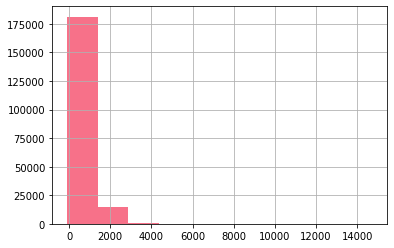

In [190]:
delivery_df['min_item_price'].hist()

<AxesSubplot:>

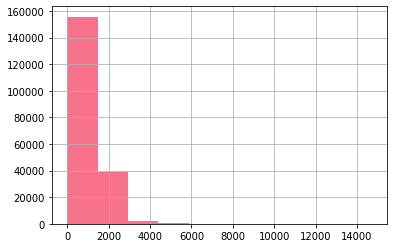

In [191]:
delivery_df['max_item_price'].hist()

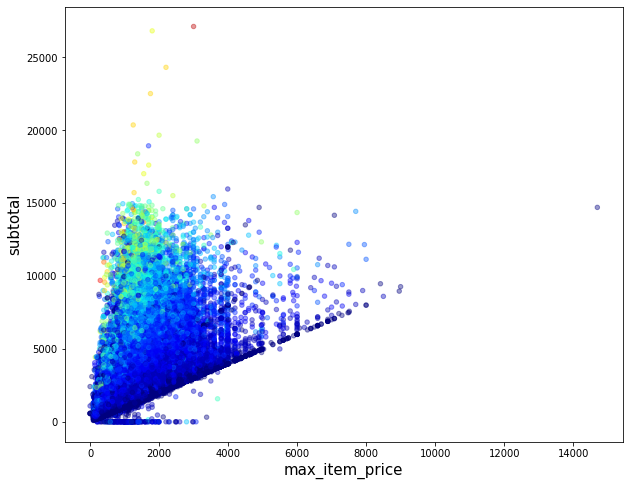

In [216]:
delivery_df.plot(kind='scatter', x='max_item_price', y='subtotal', alpha=0.4, figsize=(10,8), c='num_distinct_items', cmap=plt.get_cmap("jet"), colorbar=False)
plt.xlabel('max_item_price', size=15)
plt.ylabel('subtotal', size=15)
plt.show()

In [227]:
delivery_df[delivery_df['max_item_price'] > delivery_df['subtotal']]['total_items'].value_counts()

1     324
2     107
3      49
4      27
5      16
7       5
6       4
9       3
8       3
14      1
15      1
13      1
11      1
Name: total_items, dtype: int64

전체 가격이 주문에 포함된 아이템 중 가장 비싼 아이템의 가격보다 낮은 데이터들을 확인할 수 있다.  

### weekday

In [249]:
import datetime
def weekday(date):
    wd = pd.Timestamp(date)
    return wd.dayofweek

In [253]:
delivery_df['weekday'] = delivery_df['created_at'].apply(weekday)
delivery_df[['created_at', 'weekday']]

,created_at,weekday
0,2015-02-06 22:24:17,4
1,2015-02-10 21:49:25,1
2,2015-01-22 20:39:28,3
3,2015-02-03 21:21:45,1
4,2015-02-15 02:40:36,6
...,...,...
197423,2015-02-17 00:19:41,1
197424,2015-02-13 00:01:59,4
197425,2015-01-24 04:46:08,5
197426,2015-02-01 18:18:15,6


### is_weekend

In [254]:
def is_weekend(weekday):
    if weekday in [5,6]:
        return 1
    else:
        return 0

In [256]:
delivery_df['is_weekend'] = delivery_df['weekday'].apply(is_weekend)

### is_holiday

In [302]:
def date_split(date):
    year = str(date.year)
    month = str(date.month)
    if len(month)<2:
        month = '0'+month
    day = str(date.day)
    if len(day)<2:
        day = '0'+day
    return year+'-'+month+'-'+day
delivery_df['date'] = delivery_df['created_at'].apply(date_split)
delivery_df['date']

0         2015-02-06
1         2015-02-10
2         2015-01-22
3         2015-02-03
4         2015-02-15
             ...    
197423    2015-02-17
197424    2015-02-13
197425    2015-01-24
197426    2015-02-01
197427    2015-02-08
Name: date, Length: 197414, dtype: object

In [332]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=delivery_df.date.min(), end=delivery_df.date.max())
delivery_df['date'] = pd.to_datetime(delivery_df['date'])
delivery_df['is_holiday'] = delivery_df['date'].isin(holidays)
print('holiday_list:', holidays)
print('mean deilvery_time at holiday: {0:.2f}'.format(delivery_df[delivery_df['date'] == '2015-02-16']['delivery_time'].mean()))
print('mean delivery_time: {0:.2f}'.format(delivery_df['delivery_time'].mean()))

delivery_df[delivery_df['is_holiday']==True]

holiday_list: DatetimeIndex(['2015-02-16'], dtype='datetime64[ns]', freq=None)
mean deilvery_time at holiday: 3153.84
mean delivery_time: 2861.59


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,weekday,is_weekend,is_holiday,date
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,...,8.0,6.0,18.0,446,289.0,1586,0,0,True,2015-02-16
11,3.0,2015-02-16 04:19:33,2015-02-16 06:34:00,5477,mexican,1.0,2,2200,2,600,...,3.0,3.0,4.0,446,642.0,8067,0,0,True,2015-02-16
24,1.0,2015-02-16 02:21:20,2015-02-16 03:54:14,5058,italian,1.0,3,3400,3,1400,...,22.0,21.0,39.0,446,501.0,5574,0,0,True,2015-02-16
37,1.0,2015-02-16 19:19:17,2015-02-16 20:16:43,4149,sandwich,2.0,8,7870,6,825,...,12.0,11.0,9.0,251,98.0,3446,0,0,True,2015-02-16
93,3.0,2015-02-16 22:09:05,2015-02-16 23:11:11,1698,sandwich,3.0,1,1125,1,975,...,7.0,7.0,7.0,251,813.0,3726,0,0,True,2015-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197190,4.0,2015-02-16 04:10:59,2015-02-16 04:53:08,1409,vietnamese,5.0,1,1370,1,795,...,53.0,52.0,83.0,251,520.0,2529,0,0,True,2015-02-16
197319,4.0,2015-02-16 03:04:11,2015-02-16 03:37:27,6110,italian,2.0,2,2823,2,1198,...,81.0,81.0,136.0,251,335.0,1996,0,0,True,2015-02-16
197343,1.0,2015-02-16 20:15:49,2015-02-16 21:04:02,215,italian,1.0,2,2397,2,999,...,15.0,15.0,17.0,446,722.0,2893,0,0,True,2015-02-16
197350,1.0,2015-02-16 18:04:25,2015-02-16 19:00:48,2956,fast,4.0,4,1868,1,345,...,6.0,6.0,8.0,251,331.0,3383,0,0,True,2015-02-16


### estimated_store_to_consumer_driving_duration

In [230]:
delivery_df['estimated_store_to_consumer_driving_duration'] = delivery_df[]

0         861.0
1         690.0
2         690.0
3         289.0
4         650.0
          ...  
197423    331.0
197424    915.0
197425    795.0
197426    384.0
197427    134.0
Name: estimated_store_to_consumer_driving_duration, Length: 197414, dtype: float64

<AxesSubplot:xlabel='estimated_store_to_consumer_driving_duration', ylabel='delivery_time'>

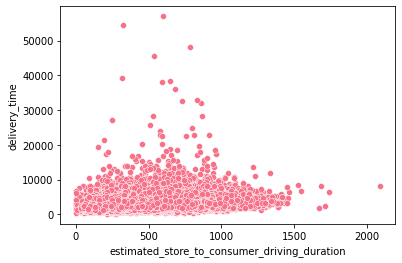

In [333]:
sns.scatterplot(y=delivery_df['delivery_time'], x=delivery_df['estimated_store_to_consumer_driving_duration'])

<AxesSubplot:>

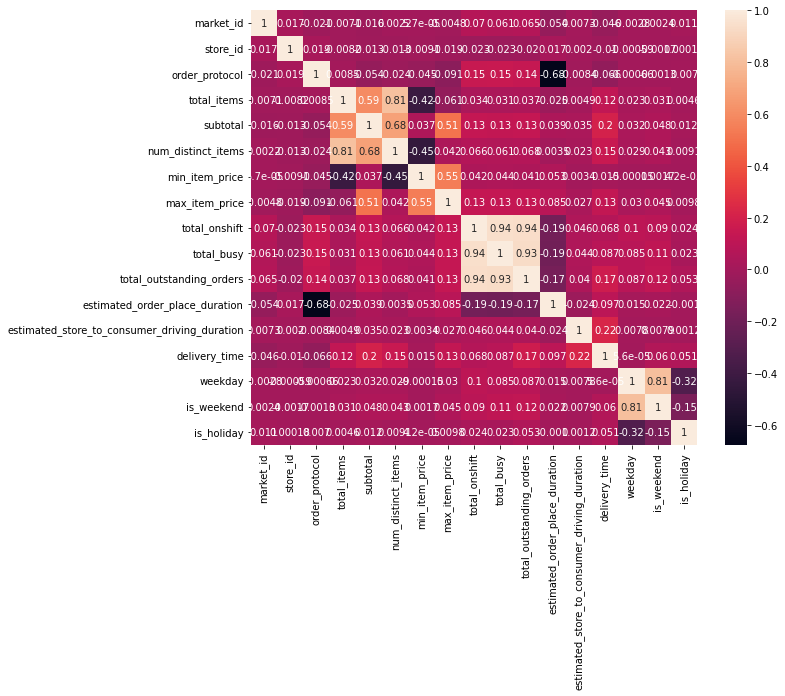

In [337]:
plt.figure(figsize=(10,8))
sns.heatmap(delivery_df.corr(), annot=True)

### total_onshift

In [228]:
delivery_df[delivery_df['total_onshift'].isnull()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
160,6.0,2015-02-06 01:11:56,2015-02-06 01:42:51,976,breakfast,2.0,2,575,2,225,350,NaN,NaN,NaN,251,671.0,1855
161,6.0,2015-02-14 02:07:47,2015-02-14 03:17:37,976,breakfast,2.0,5,1415,3,185,675,NaN,NaN,NaN,251,893.0,4190
162,6.0,2015-01-31 21:58:30,2015-01-31 22:55:32,976,breakfast,2.0,1,650,1,650,650,NaN,NaN,NaN,251,479.0,3422
163,6.0,2015-02-08 03:28:59,2015-02-08 05:32:11,976,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN,251,1104.0,7392
164,6.0,2015-01-23 19:29:17,2015-01-23 20:25:25,976,breakfast,2.0,6,1110,5,185,185,NaN,NaN,NaN,251,584.0,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197196,3.0,2015-02-10 19:55:29,2015-02-10 20:33:13,5382,indian,2.0,3,1792,3,163,1177,NaN,NaN,NaN,251,725.0,2264
197197,3.0,2015-02-06 03:05:38,2015-02-06 03:58:16,5382,indian,2.0,8,2923,5,50,1199,NaN,NaN,NaN,251,683.0,3158
197198,3.0,2015-01-23 03:57:56,2015-01-23 04:43:17,5382,indian,2.0,3,3297,3,799,1299,NaN,NaN,NaN,251,725.0,2721
197199,3.0,2015-01-24 03:15:41,2015-01-24 04:04:19,5382,indian,2.0,4,2776,4,179,1099,NaN,NaN,NaN,251,820.0,2918


In [229]:
delivery_df.shape

(197414, 17)

In [ ]:
delivery_df.drop()